In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

sys.path.append(os.path.abspath('../..'))

In [3]:
from hit_finding.constants import *
from hit_finding.metrics import *

In [4]:
from learning_tabular.constants import CHANNELS, FAMILIES, LABEL_FIELD
from learning_tabular.preprocessing import load_plate_csv, list_columns

In [5]:
# from os import chdir, scandir, makedirs
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
import seaborn as sns


from tqdm.notebook import tqdm
from glob import glob

import os

# from itertools import cycle
# from multiprocessing import Pool, cpu_count

import pandas as pd
import numpy as np
import json

In [6]:
cols = json.load(open('/storage/users/g-and-n/plates/columns.txt', 'r'))
chans = [c for c in cols.keys() if c not in ['GENERAL', 'MIXED']]
chans

del cols['GENERAL']
del cols['MIXED']

cols['ALL'] = sum(cols.values(), [])
num_channels_all = len(cols['ALL'] )

# sum(cols.values(),[])
chans

# cols['ALL']
# num_cols = [len(c in cols) for c in channels]

['AGP', 'DNA', 'ER', 'Mito', 'RNA']

# Load Results

## Load SS results

In [7]:
map_res = pd.read_csv(f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/map_no-abs.csv', index_col=[0])

In [8]:
raw_res = pd.read_csv(f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/raw.csv', index_col=[0])

In [9]:
raw1to1_res = pd.read_csv(f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/raw1to1_no-abs.csv', index_col=[0])

In [10]:
map_res.shape, raw_res.shape, raw1to1_res.shape

((30438, 235), (30438, 235), (30438, 235))

In [11]:
res = map_res.join(raw_res.iloc[:,1:], how='inner', lsuffix='_map', rsuffix='_raw')
res.shape

(30438, 469)

In [12]:
res = res.join(raw1to1_res.add_suffix('_raw1to1').iloc[:,1:], how='inner')
res.shape

(30438, 703)

In [13]:
res

Rep_Count  AGP_Med_Corr_map  AGP_SS_2_map  \
Metadata_broad_sample                                               
BRD-A00037023-001-05-1          4          0.329475     14.000000   
BRD-A00051892-001-05-0          4          0.320207     11.250000   
BRD-A00100033-001-04-8          8         -0.016669     20.375000   
BRD-A00214921-001-04-2          4         -0.334814     14.500000   
BRD-A00250346-001-05-0          4         -0.016536     17.250000   
...                           ...               ...           ...   
BRD-M97109212-001-01-8          4          0.114875     19.500000   
BRD-M97925630-001-01-1          4          0.264035      8.500000   
BRD-M98484762-001-01-8          4          0.117381     11.000000   
BRD-U48977771-000-01-3          3          0.110914      7.666667   
BRD-U62737497-000-01-5          4          0.254385      9.250000   

                        AGP_MAS_2_map  AGP_SS_3_map  AGP_MAS_3_map  \
Metadata_broad_sample                                                
BRD-A00037023-001-05-1       0.231593      6.750000       0.160810   
BRD-A00051892-001-05-0       0.204665      5.250000       0.139813   
BRD-A00100033-001-04-8       0.000000     15.000000       0.000000   
BRD-A00214921-001-04-2       0.000000      7.250000       0.000000   
BRD-A00250346-001-05-0       0.000000      8.500000       0.000000   
...                               ...           ...            ...   
BRD-M97109212-001-01-8       0.161391     11.500000       0.123940   
BRD-M97925630-001-01-1       0.161544      3.750000       0.107299   
BRD-M98484762-001-01-8       0.122531      7.500000       0.101177   
BRD-U48977771-000-01-3       0.099437      4.333333       0.074758   
BRD-U62737497-000-01-5       0.165412      3.750000       0.105320   

                        AGP_SS_4_map  AGP_MAS_4_map  AGP_SS_5_map  \
Metadata_broad_sample                                               
BRD-A00037023-001-05-1      2.000000       0.087534      1.250000   
BRD-A00051892-001-05-0      1.750000       0.080721      0.750000   
BRD-A00100033-001-04-8     11.750000       0.000000      9.250000   
BRD-A00214921-001-04-2      2.750000       0.000000      2.000000   
BRD-A00250346-001-05-0      3.750000       0.000000      2.000000   
...                              ...            ...           ...   
BRD-M97109212-001-01-8      7.000000       0.096697      4.500000   
BRD-M97925630-001-01-1      2.500000       0.087609      1.500000   
BRD-M98484762-001-01-8      3.000000       0.063990      1.750000   
BRD-U48977771-000-01-3      2.333333       0.054857      1.333333   
BRD-U62737497-000-01-5      0.500000       0.038458      0.500000   

                        AGP_MAS_5_map  ...  ALL_SS_16_raw1to1  \
Metadata_broad_sample                  ...                      
BRD-A00037023-001-05-1       0.069202  ...              0.000   
BRD-A00051892-001-05-0       0.052844  ...              0.000   
BRD-A00100033-001-04-8       0.000000  ...              1.875   
BRD-A00214921-001-04-2       0.000000  ...              0.000   
BRD-A00250346-001-05-0       0.000000  ...              0.000   
...                               ...  ...                ...   
BRD-M97109212-001-01-8       0.077530  ...              0.750   
BRD-M97925630-001-01-1       0.067862  ...              0.000   
BRD-M98484762-001-01-8       0.048873  ...              0.000   
BRD-U48977771-000-01-3       0.041468  ...              0.000   
BRD-U62737497-000-01-5       0.038458  ...              0.000   

                        ALL_MAS_16_raw1to1  ALL_SS_17_raw1to1  \
Metadata_broad_sample                                           
BRD-A00037023-001-05-1            0.000000               0.00   
BRD-A00051892-001-05-0            0.000000               0.00   
BRD-A00100033-001-04-8            0.015775               1.25   
BRD-A00214921-001-04-2            0.000000               0.00   
BRD-A00250346-001-05-0            0.000000               0.00   
...             

In [14]:
import joblib

In [16]:
joblib.dump(res, f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/all_no-abs.sav')

['/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/all_no-abs.sav']

ss_res = pd.read_csv(f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/all_no-abs.csv', index_col=[0])
ss_res

## Plot Sensitivity

In [18]:
res

Rep_Count  AGP_Med_Corr_map  AGP_SS_2_map  \
Metadata_broad_sample                                               
BRD-A00037023-001-05-1          4          0.329475     14.000000   
BRD-A00051892-001-05-0          4          0.320207     11.250000   
BRD-A00100033-001-04-8          8         -0.016669     20.375000   
BRD-A00214921-001-04-2          4         -0.334814     14.500000   
BRD-A00250346-001-05-0          4         -0.016536     17.250000   
...                           ...               ...           ...   
BRD-M97109212-001-01-8          4          0.114875     19.500000   
BRD-M97925630-001-01-1          4          0.264035      8.500000   
BRD-M98484762-001-01-8          4          0.117381     11.000000   
BRD-U48977771-000-01-3          3          0.110914      7.666667   
BRD-U62737497-000-01-5          4          0.254385      9.250000   

                        AGP_MAS_2_map  AGP_SS_3_map  AGP_MAS_3_map  \
Metadata_broad_sample                                                
BRD-A00037023-001-05-1       0.231593      6.750000       0.160810   
BRD-A00051892-001-05-0       0.204665      5.250000       0.139813   
BRD-A00100033-001-04-8       0.000000     15.000000       0.000000   
BRD-A00214921-001-04-2       0.000000      7.250000       0.000000   
BRD-A00250346-001-05-0       0.000000      8.500000       0.000000   
...                               ...           ...            ...   
BRD-M97109212-001-01-8       0.161391     11.500000       0.123940   
BRD-M97925630-001-01-1       0.161544      3.750000       0.107299   
BRD-M98484762-001-01-8       0.122531      7.500000       0.101177   
BRD-U48977771-000-01-3       0.099437      4.333333       0.074758   
BRD-U62737497-000-01-5       0.165412      3.750000       0.105320   

                        AGP_SS_4_map  AGP_MAS_4_map  AGP_SS_5_map  \
Metadata_broad_sample                                               
BRD-A00037023-001-05-1      2.000000       0.087534      1.250000   
BRD-A00051892-001-05-0      1.750000       0.080721      0.750000   
BRD-A00100033-001-04-8     11.750000       0.000000      9.250000   
BRD-A00214921-001-04-2      2.750000       0.000000      2.000000   
BRD-A00250346-001-05-0      3.750000       0.000000      2.000000   
...                              ...            ...           ...   
BRD-M97109212-001-01-8      7.000000       0.096697      4.500000   
BRD-M97925630-001-01-1      2.500000       0.087609      1.500000   
BRD-M98484762-001-01-8      3.000000       0.063990      1.750000   
BRD-U48977771-000-01-3      2.333333       0.054857      1.333333   
BRD-U62737497-000-01-5      0.500000       0.038458      0.500000   

                        AGP_MAS_5_map  ...  ALL_SS_16_raw1to1  \
Metadata_broad_sample                  ...                      
BRD-A00037023-001-05-1       0.069202  ...              0.000   
BRD-A00051892-001-05-0       0.052844  ...              0.000   
BRD-A00100033-001-04-8       0.000000  ...              1.875   
BRD-A00214921-001-04-2       0.000000  ...              0.000   
BRD-A00250346-001-05-0       0.000000  ...              0.000   
...                               ...  ...                ...   
BRD-M97109212-001-01-8       0.077530  ...              0.750   
BRD-M97925630-001-01-1       0.067862  ...              0.000   
BRD-M98484762-001-01-8       0.048873  ...              0.000   
BRD-U48977771-000-01-3       0.041468  ...              0.000   
BRD-U62737497-000-01-5       0.038458  ...              0.000   

                        ALL_MAS_16_raw1to1  ALL_SS_17_raw1to1  \
Metadata_broad_sample                                           
BRD-A00037023-001-05-1            0.000000               0.00   
BRD-A00051892-001-05-0            0.000000               0.00   
BRD-A00100033-001-04-8            0.015775               1.25   
BRD-A00214921-001-04-2            0.000000               0.00   
BRD-A00250346-001-05-0            0.000000               0.00   
...             

In [7]:
# https://stackoverflow.com/questions/22104256/does-matplotlib-have-a-function-for-drawing-diagonal-lines-in-axis-coordinates
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

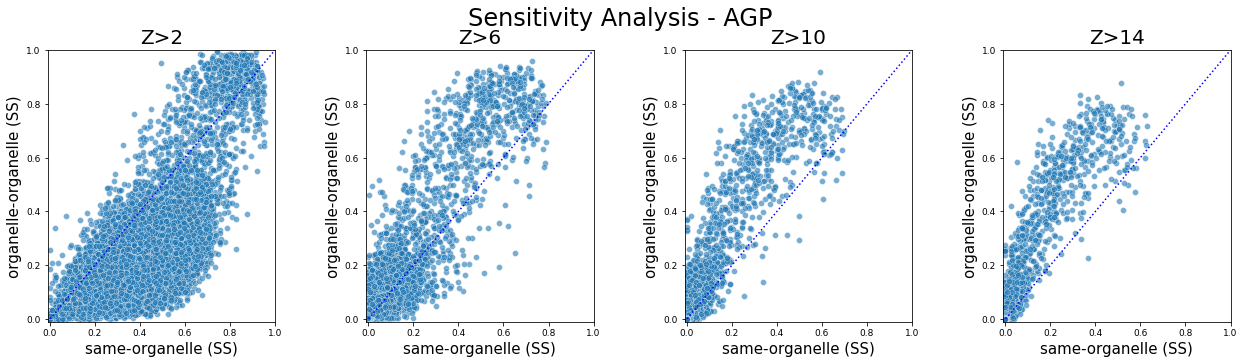

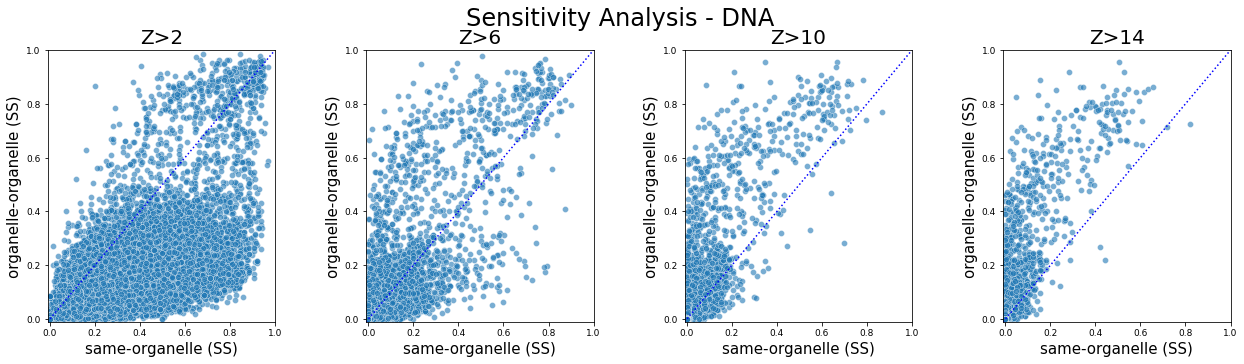

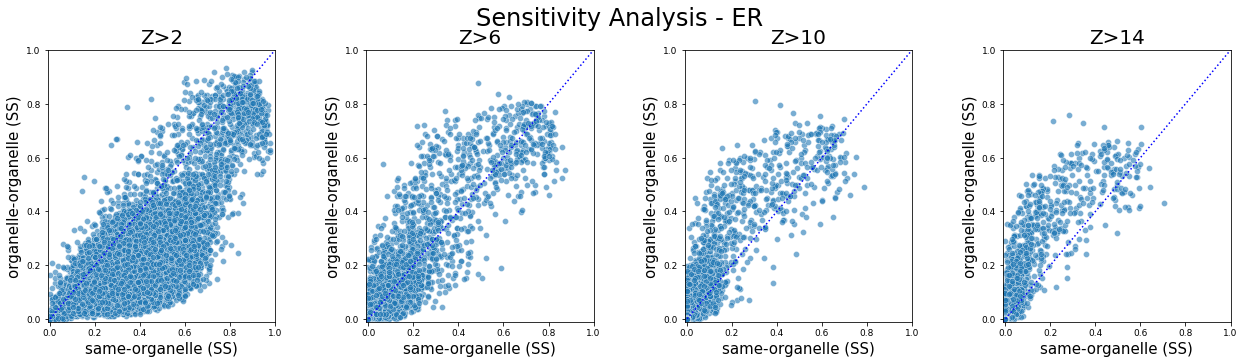

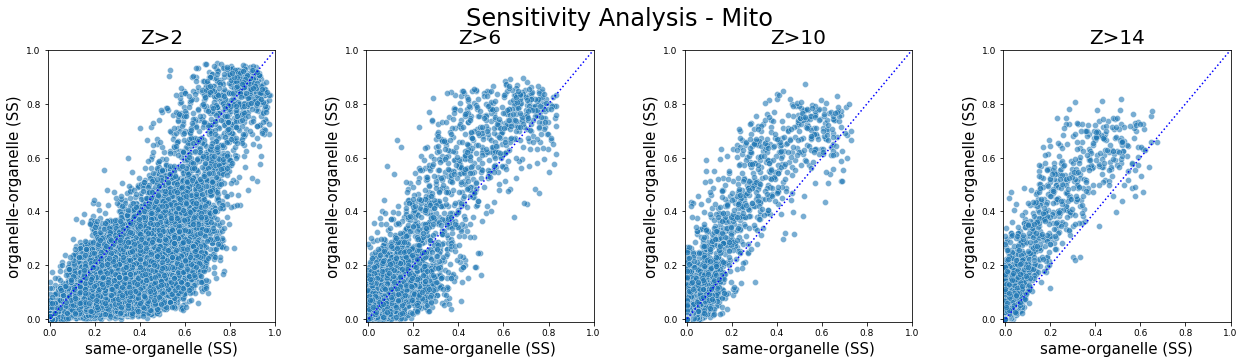

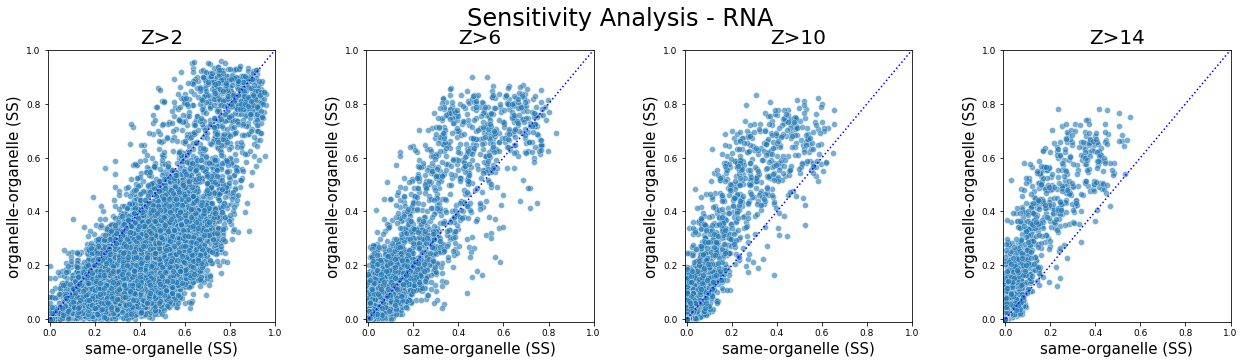

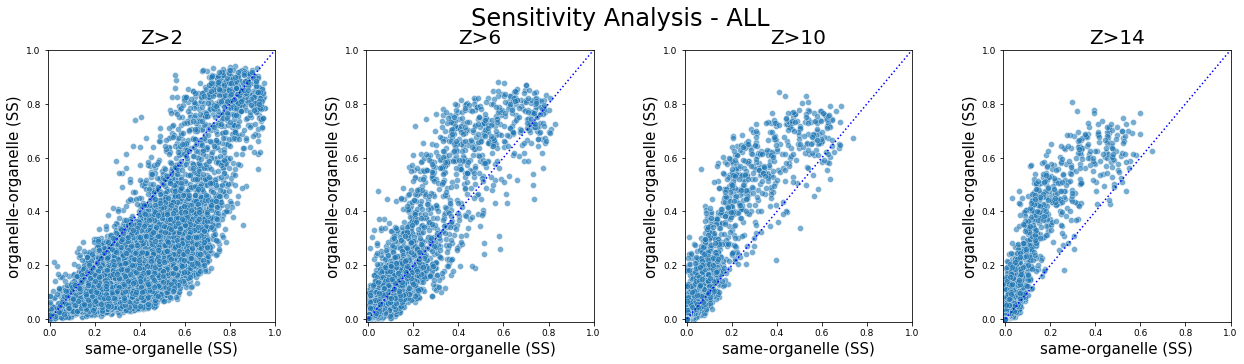

In [22]:
nrow = 1
ncol = 4
d={'xlabel':"same-organelle (SS)", 'ylabel':"organelle-organelle (SS)"}

for chan, colms in cols.items():
    fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5.3,nrow*5), subplot_kw=d, facecolor='#FFFFFF')
    fig.suptitle(f'Sensitivity Analysis - {chan}', fontsize = 24, y = 1)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, t in enumerate([2,6,10,14]):
        ax[i].set_title(f'Z>{t}')
        
        res_data = res/len(colms)
        _ = sns.scatterplot(data=res_data, x=f'{chan}_SS_{t}_raw', y=f'{chan}_SS_{t}_map', alpha=0.6, ax=ax[i])


        add_identity(ax[i], color='b', ls=':')


        ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                         bottom=True, top=False, left=True, right=False)
        ax[i].tick_params(axis='both', labelsize = 9)
        ax[i].yaxis.label.set_size(15)
        ax[i].xaxis.label.set_size(15)
        ax[i].title.set_size(20)

        ax[i].set(xlim=(-0.01, 1), ylim=(-0.01, 1))

        # _ = fig.legend(symbols, zscores.keys(), markerscale=1.2, loc='center right')#, fontsize='xx-large')

#         _ = fig.savefig(f'/sise/assafzar-group/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/plots/ss-raw-map-no-abs-several-ts.png', format='png')

## Plot Complementary

In [25]:
def enter_bucket_wrapper(t, th, chan, method_a = 'map',method_b = 'raw1to1'):
    def enter_bucket(sr):
        res = 0
        if sr[f'{chan}_SS_{t}_{method_a}'] > th:
            res += 1
        if sr[f'{chan}_SS_{t}_{method_b}'] > th:
            res += 10

        if res == 1:
            return method_a
        if res == 10:
            return method_b
        if res == 11:
            return 'both'

        return 'none'
    
    return enter_bucket

In [35]:
cs = {chan:
        {t:
         pd.concat({f'{th:.1f}': res.apply(enter_bucket_wrapper(t, th * len(cols[chan]), chan), axis=1).value_counts() for th in np.arange(0, 1.01, 0.1)}, axis=1)
         for t in [2,6,10,14]}
      for chan in cols.keys()}

In [56]:
def plot_complementary(res, chan):
    nrow = 1
    ncol = 4
#     ylims = [10000, 1200, 700, 550]
    d={'xlabel':"", 'ylabel':"Amount of Hits"}

    fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*8,nrow*5), subplot_kw=d, facecolor='white')
    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    fig.suptitle(f'Distributions of hits {chan}', fontsize = 32, y = 1)
    ts = [2,6,10,14]

    for i, t in enumerate(ts):
        # i=t-2
#         counts = pd.concat({f'{th:.1f}': res.apply(enter_bucket_wrapper(t, th * len(cols[chan]), chan), axis=1).value_counts() for th in np.arange(0, 1.01, 0.1)}, axis=1)
        counts = cs[chan][t]

        labels = counts.columns
        width = 0.55      # the width of the bars: can also be len(x) sequence


        r1=ax[i].bar(labels, counts.loc['map'], width, label='map')
        r2=ax[i].bar(labels, counts.loc['both'], width, bottom=counts.loc['map'], label='both')
        r3=ax[i].bar(labels, counts.loc['raw1to1'], width, bottom=counts.loc['map']+counts.loc['both'], label='raw1to1')
        # ax[i//ncol,i%ncol].bar_label(r1, padding=3)
        ax[i].bar_label(r1,label_type='center')
        ax[i].bar_label(r2,label_type='center')
        ax[i].bar_label(r3,label_type='center',padding=3)

        # ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
        ax[i].set_xlim([1.5,6.5])
        ax[i].set_ylim([0, cs[chan][t].loc[[i for i in cs[chan][t].index if i is not 'none'], '0.2'].sum().max()])
        ax[i].set_ylabel('Amount of Hits')
        ax[i].set_title(f'Hits Distribution - Norm-SS({t})', fontsize = 24)
        ax[i].legend()

    # fig.tight_layout()
    fig.tight_layout()
    # _ = fig.savefig(f'/sise/assafzar-group/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/plots/histogram-stacked-all-thersholds-no-abs.png', format='png')
    plt.show()
    # counts.head()

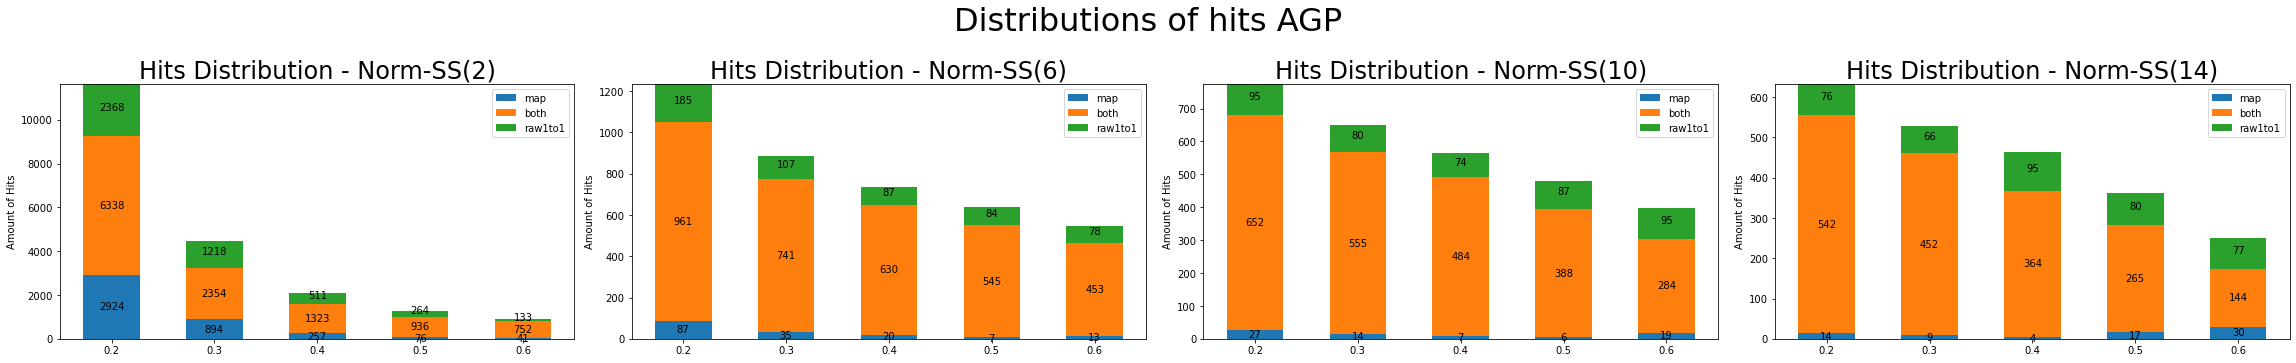

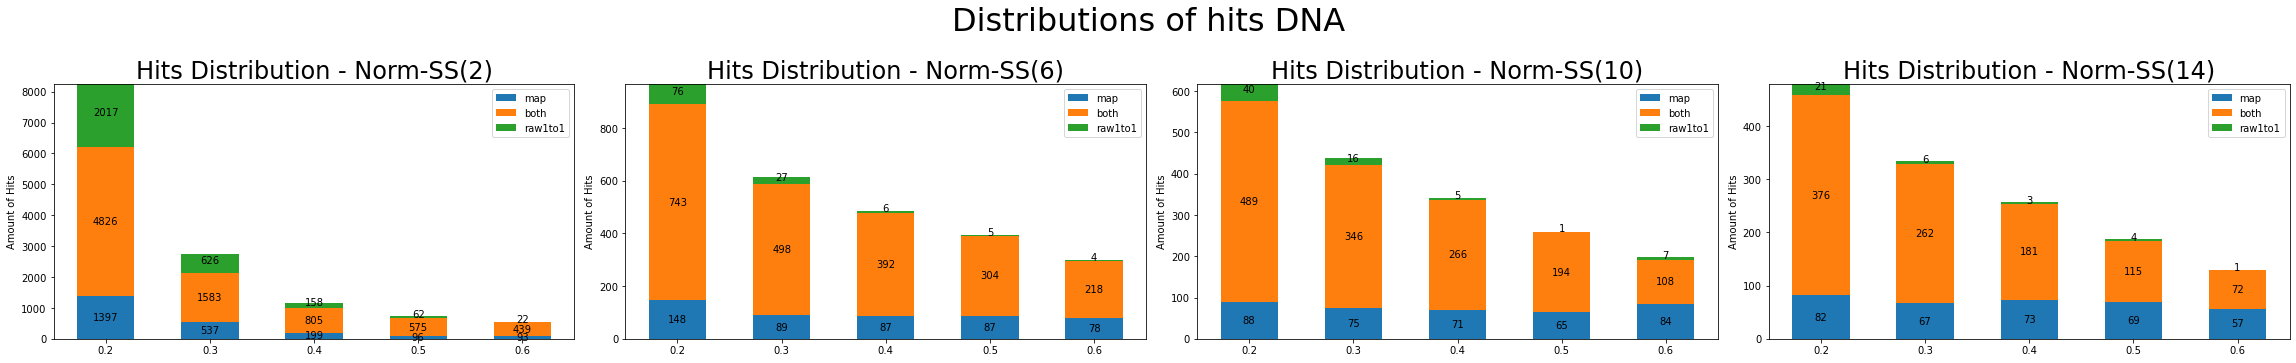

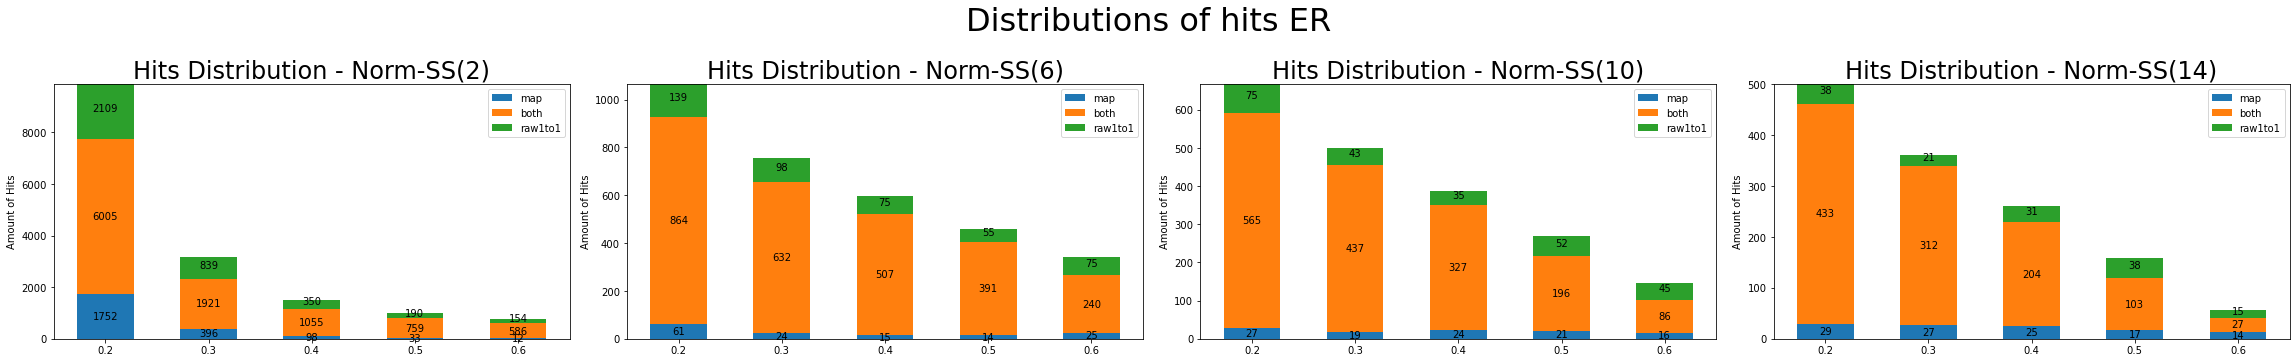

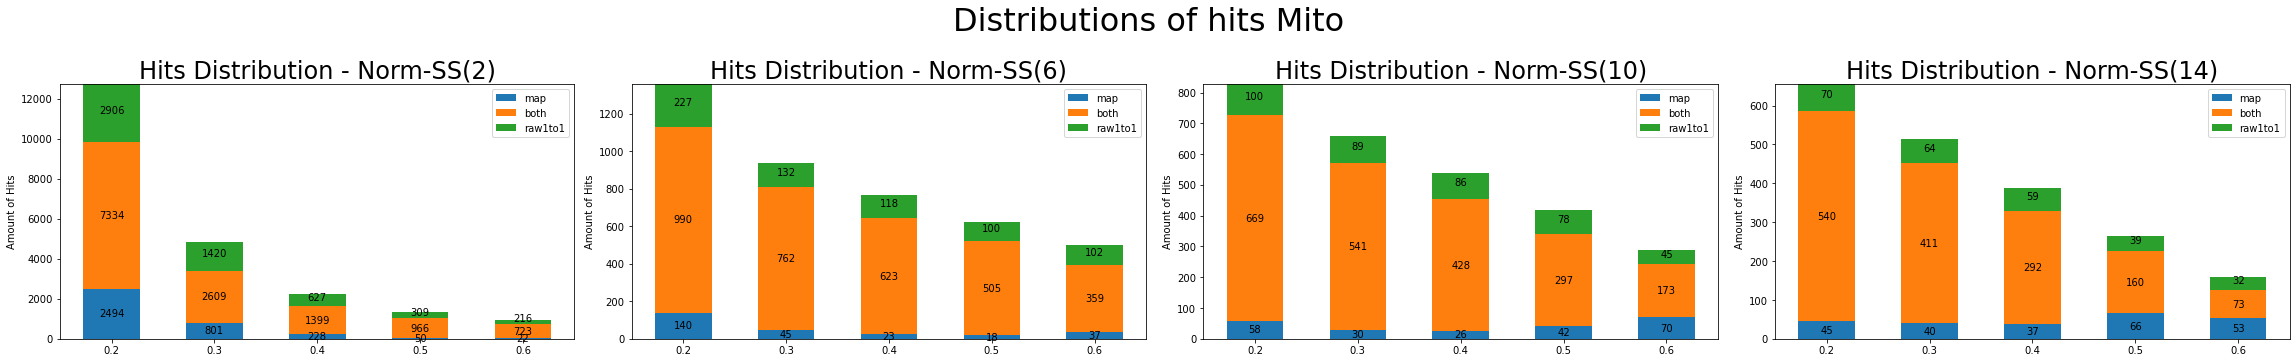

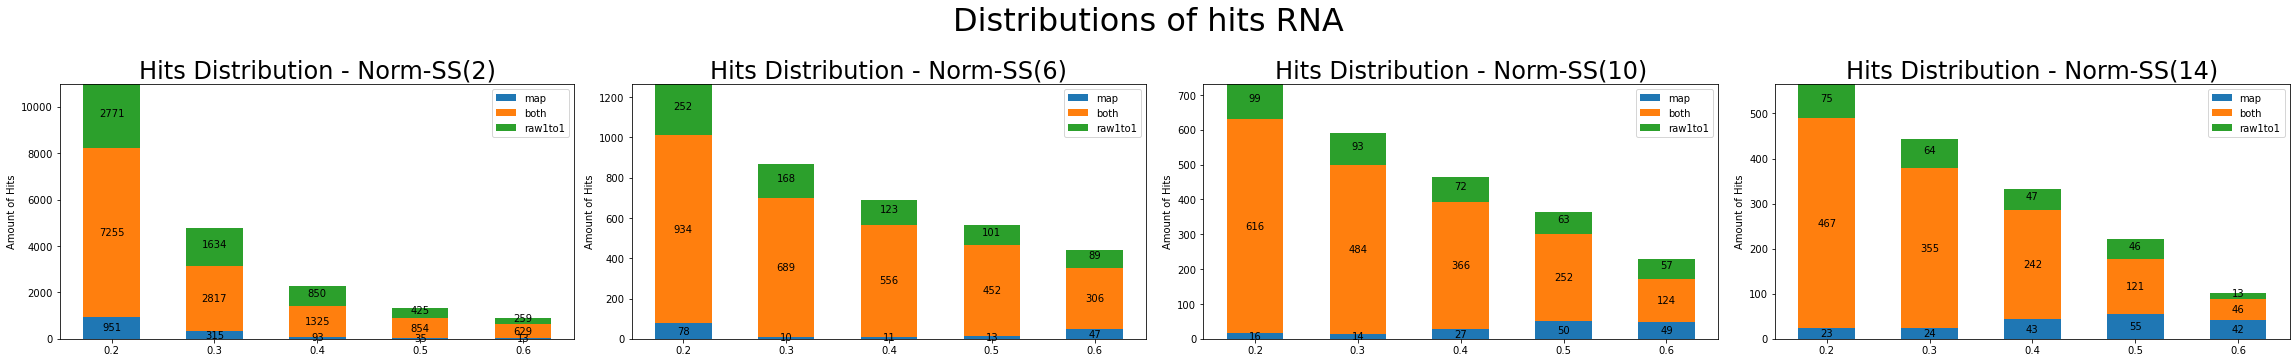

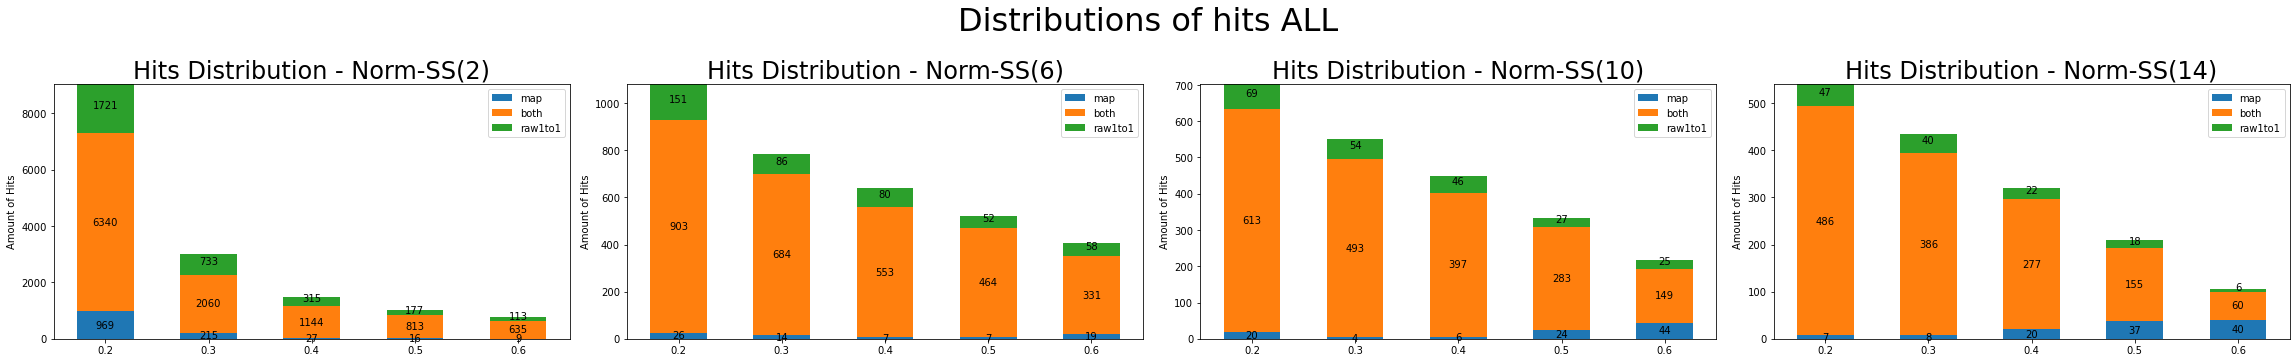

In [57]:
for chan in cols.keys():
    plot_complementary(res, chan)

In [58]:
print('')

## Load FracS results

In [8]:
ts = [2, 6, 10, 14]

In [9]:
res_pth = '/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/frac_score_new'
plates = os.listdir(os.path.join(res_pth, '2'))
plates = [p.split('.')[0] for p in plates]
plates.sort()

zscores = {}
for t in ts:
    zscores[t] = {}
    for p in tqdm(plates):
        zscores[t][p] = pd.read_csv(os.path.join(res_pth, str(t), f'{p}.csv'), index_col=[0,1,2])

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

In [10]:
res = {t: pd.concat(zscores[t].values()) for t in ts}

In [15]:
res[2]

AGP_map_no-abs  \
Plate Metadata_broad_sample  Image_Metadata_Well                   
24277 BRD-K18250272-003-03-7 a01                        0.232558   
      BRD-K18316707-001-01-9 a02                        0.023256   
      BRD-K18438502-001-02-6 a03                        0.058140   
      BRD-K18550767-001-02-8 a04                        0.081395   
      BRD-K18574842-323-03-3 a05                        0.058140   
...                                                          ...   
26795 BRD-K98110717-001-01-7 n19                        0.093023   
      BRD-K98427581-001-01-8 k02                        0.023256   
      BRD-K98538413-001-01-6 g24                        0.104651   
      BRD-K98758861-001-01-7 i02                        0.011628   
      BRD-K99216703-001-01-7 o16                        0.081395   

                                                  DNA_map_no-abs  \
Plate Metadata_broad_sample  Image_Metadata_Well                   
24277 BRD-K18250272-003-03-7 a01                        0.185714   
      BRD-K18316707-001-01-9 a02                        0.000000   
      BRD-K18438502-001-02-6 a03                        0.000000   
      BRD-K18550767-001-02-8 a04                        0.200000   
      BRD-K18574842-323-03-3 a05                        0.228571   
...                                                          ...   
26795 BRD-K98110717-001-01-7 n19                        0.528571   
      BRD-K98427581-001-01-8 k02                        0.100000   
      BRD-K98538413-001-01-6 g24                        0.000000   
      BRD-K98758861-001-01-7 i02                        0.000000   
      BRD-K99216703-001-01-7 o16                        0.057143   

                                                  ER_map_no-abs  \
Plate Metadata_broad_sample  Image_Metadata_Well                  
24277 BRD-K18250272-003-03-7 a01                       0.383721   
      BRD-K18316707-001-01-9 a02                       0.244186   
      BRD-K18438502-001-02-6 a03                       0.174419   
      BRD-K18550767-001-02-8 a04                       0.139535   
      BRD-K18574842-323-03-3 a05                       0.209302   
...                                                         ...   
26795 BRD-K98110717-001-01-7 n19                       0.034884   
      BRD-K98427581-001-01-8 k02                       0.034884   
      BRD-K98538413-001-01-6 g24                       0.034884   
      BRD-K98758861-001-01-7 i02                       0.034884   
      BRD-K99216703-001-01-7 o16                       0.000000   

                                                  Mito_map_no-abs  \
Plate Metadata_broad_sample  Image_Metadata_Well                    
24277 BRD-K18250272-003-03-7 a01                         0.511628   
      BRD-K18316707-001-01-9 a02                         0.569767   
      BRD-K18438502-001-02-6 a03                         0.255814   
      BRD-K18550767-001-02-8 a04                         0.127907   
      BRD-K18574842-323-03-3 a05                         0.151163   
...                                                           ...   
26795 BRD-K98110717-001-01-7 n19                         0.023256   
      BRD-K98427581-001-01-8 k02                         0.046512   
      BRD-K98538413-001-01-6 g24                         0.127907   
      BRD-K98758861-001-01-7 i02                         0.023256   
      BRD-K99216703-001-01-7 o16                         0.046512   

                                                  RNA_map_no-abs  \
Plate Metadata_broad_sample  Image_Metadata_Well                   
24277 BRD-K18250272-003-03-7 a01                        0.081395   
      BRD-K18316707-001-01-9 a02                        0.046512   
      BRD-K18438502-001-02-6 a03                        0.000000   
      BRD-K18550767-001-02-8 a04                        0.139535   
      BRD-K18574842-323-03-3 a05                        0.151163   
...                               

## Plot Sensitivity

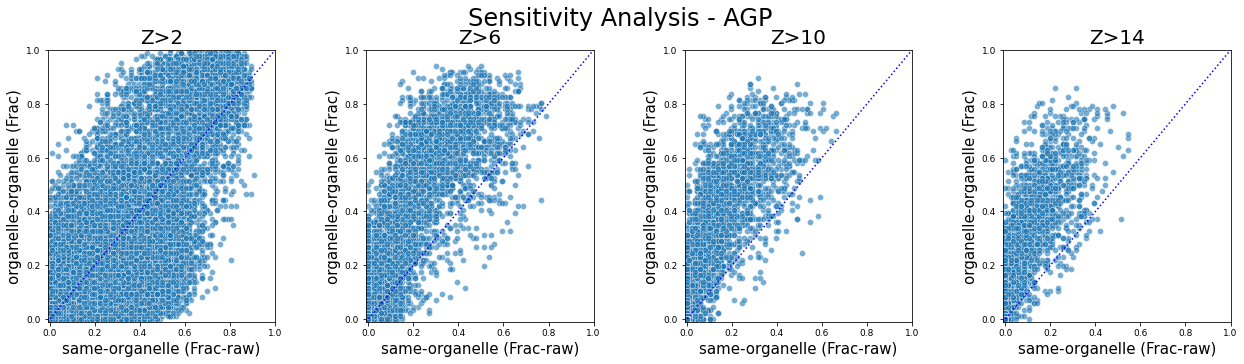

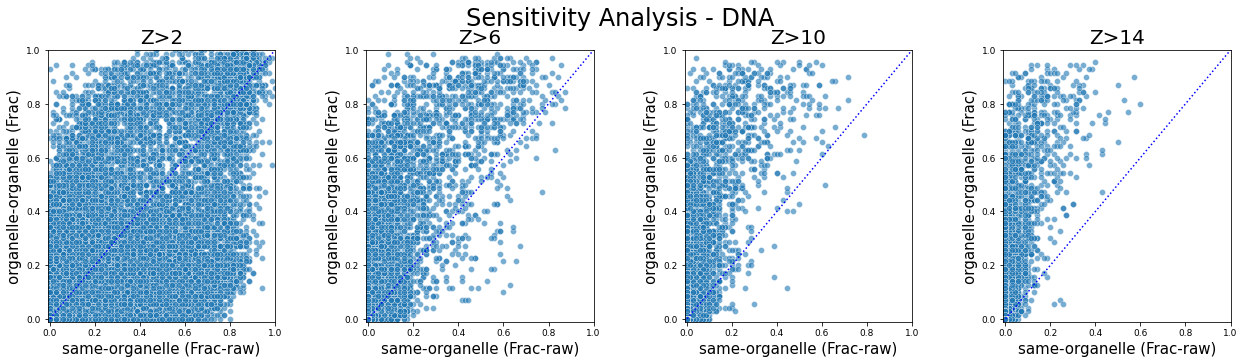

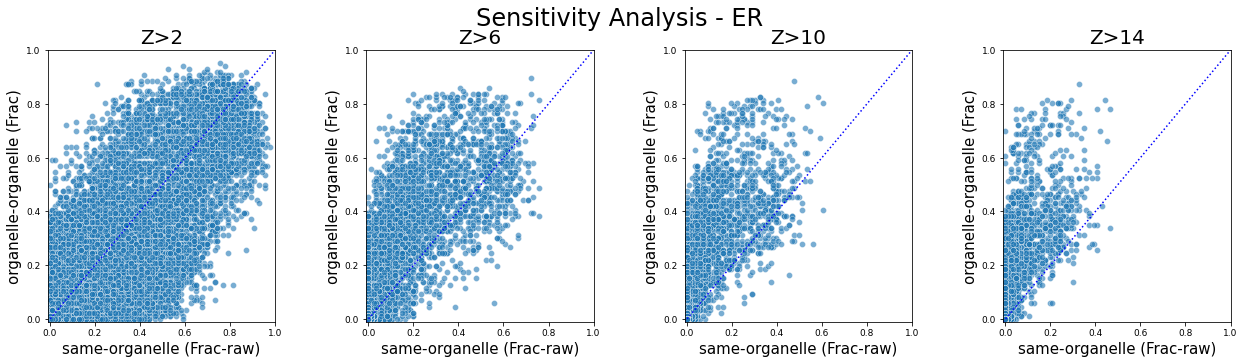

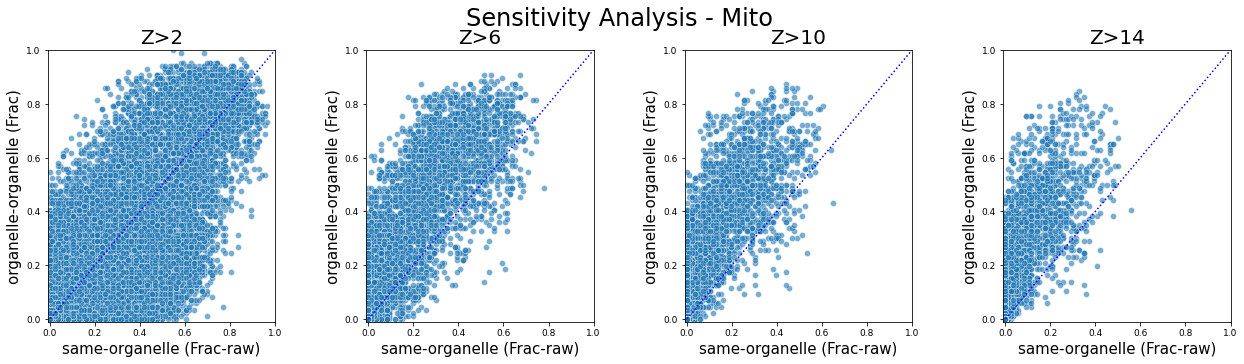

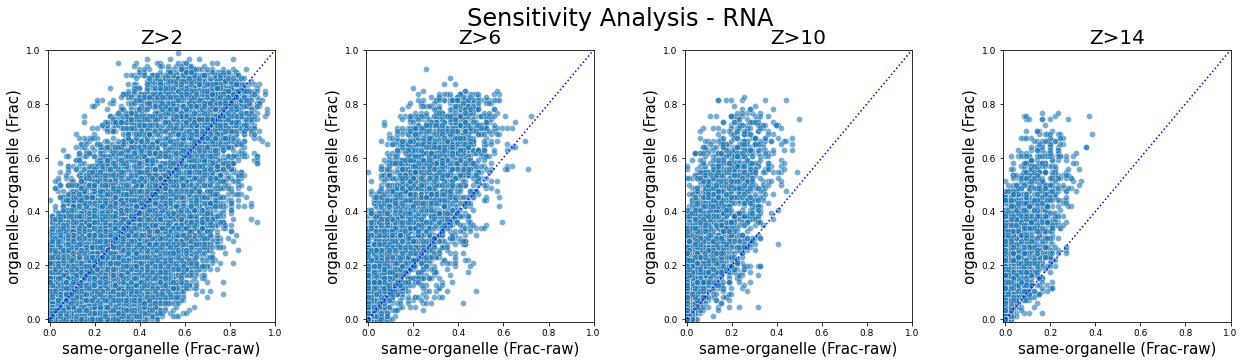

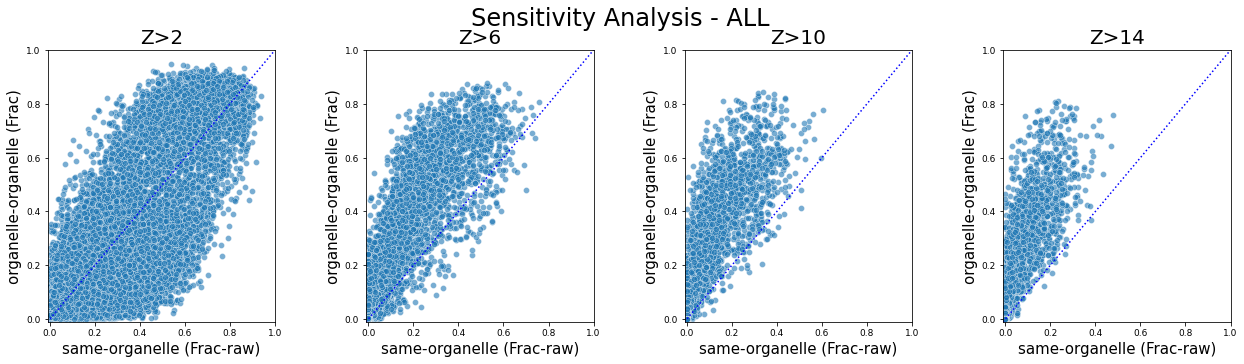

In [11]:
nrow = 1
ncol = 4
d={'xlabel':"same-organelle (Frac-raw)", 'ylabel':"organelle-organelle (Frac)"}

for chan, colms in cols.items():
    fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5.3,nrow*5), subplot_kw=d, facecolor='#FFFFFF')
    fig.suptitle(f'Sensitivity Analysis - {chan}', fontsize = 24, y = 1)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, t in enumerate(ts):
        ax[i].set_title(f'Z>{t}')
        
        _ = sns.scatterplot(data=res[t], x=f'{chan}_raw_abs', y=f'{chan}_map_no-abs', alpha=0.6, ax=ax[i])


        add_identity(ax[i], color='b', ls=':')


        ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                         bottom=True, top=False, left=True, right=False)
        ax[i].tick_params(axis='both', labelsize = 9)
        ax[i].yaxis.label.set_size(15)
        ax[i].xaxis.label.set_size(15)
        ax[i].title.set_size(20)

        ax[i].set(xlim=(-0.01, 1), ylim=(-0.01, 1))

        # _ = fig.legend(symbols, zscores.keys(), markerscale=1.2, loc='center right')#, fontsize='xx-large')

#         _ = fig.savefig(f'/sise/assafzar-group/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/plots/ss-raw-map-no-abs-several-ts.png', format='png')

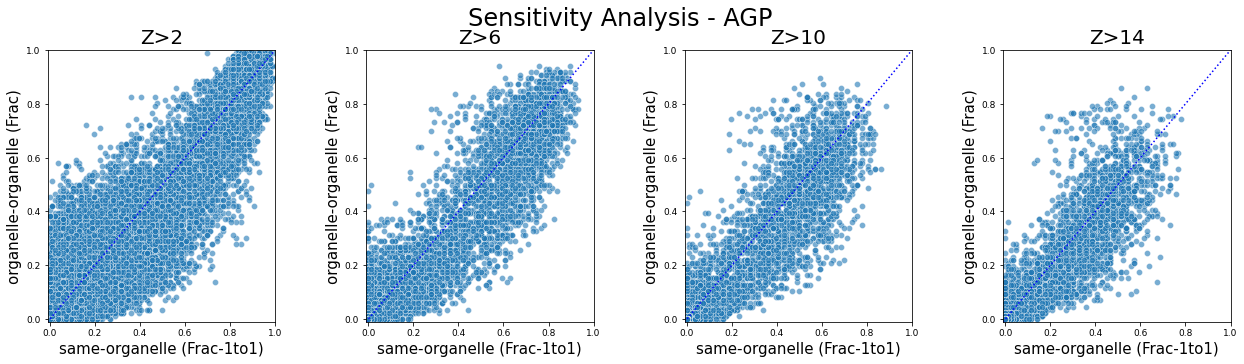

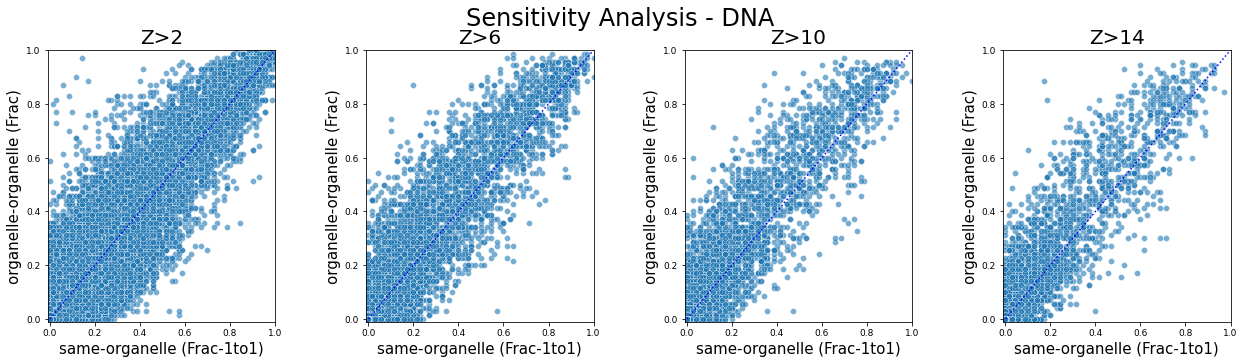

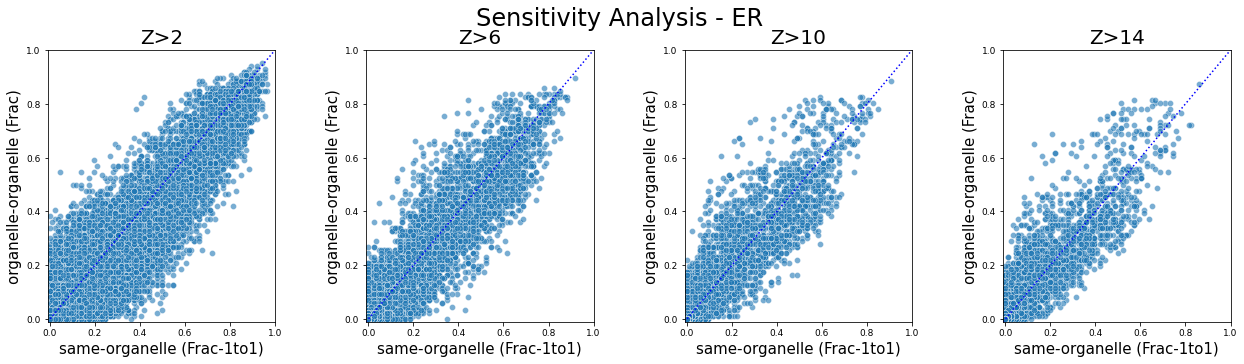

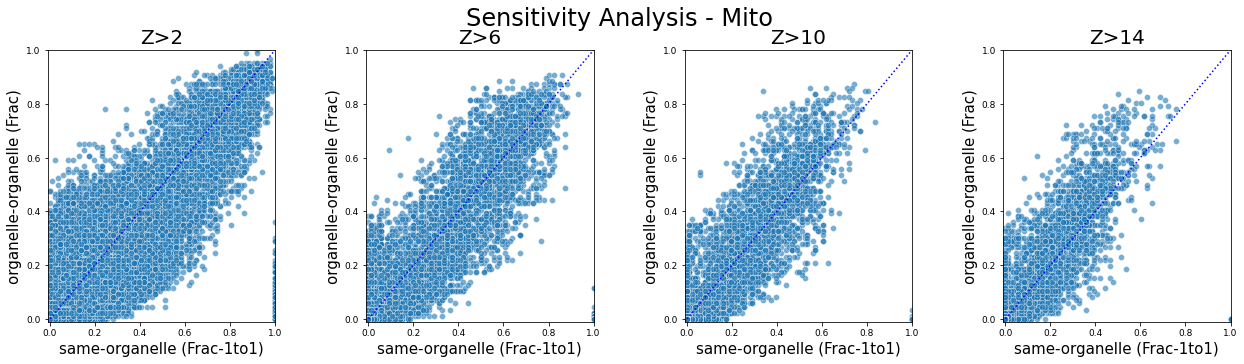

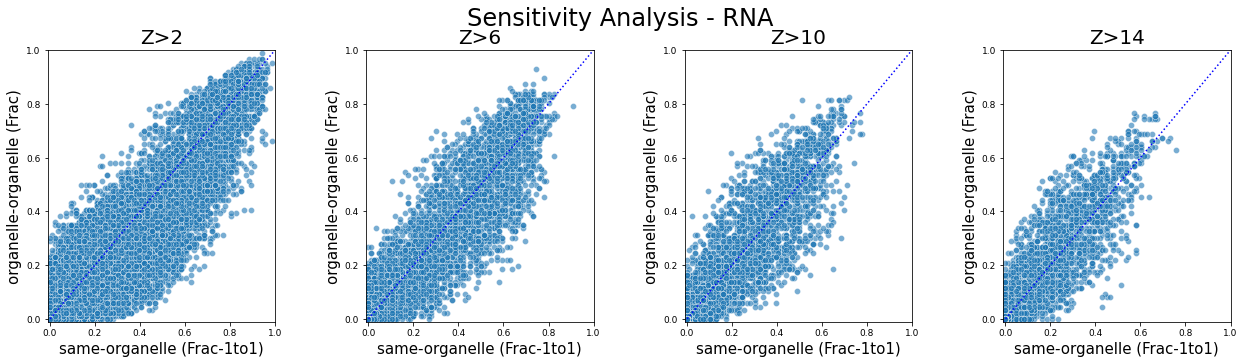

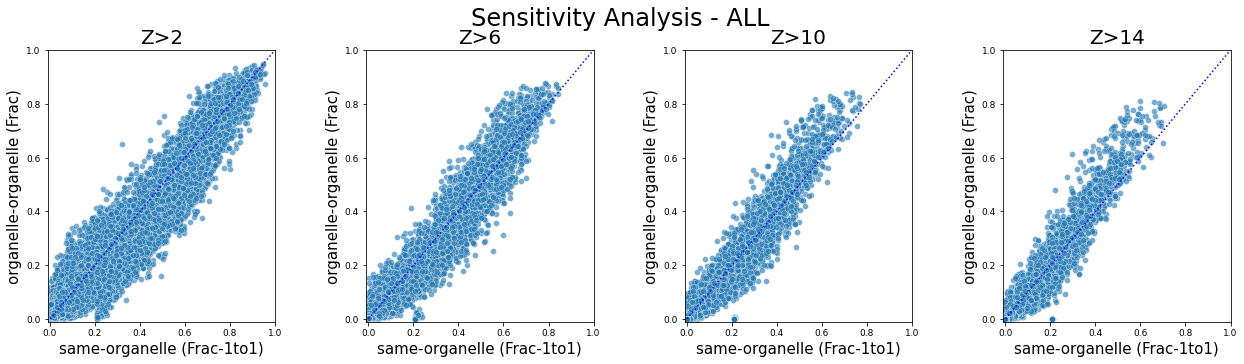

In [13]:
nrow = 1
ncol = 4
d={'xlabel':"same-organelle (Frac-1to1)", 'ylabel':"organelle-organelle (Frac)"}

for chan, colms in cols.items():
    fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5.3,nrow*5), subplot_kw=d, facecolor='#FFFFFF')
    fig.suptitle(f'Sensitivity Analysis - {chan}', fontsize = 24, y = 1)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, t in enumerate(ts):
        ax[i].set_title(f'Z>{t}')
        
        _ = sns.scatterplot(data=res[t], x=f'{chan}_raw1to1_no-abs', y=f'{chan}_map_no-abs', alpha=0.6, ax=ax[i])


        add_identity(ax[i], color='b', ls=':')


        ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                         bottom=True, top=False, left=True, right=False)
        ax[i].tick_params(axis='both', labelsize = 9)
        ax[i].yaxis.label.set_size(15)
        ax[i].xaxis.label.set_size(15)
        ax[i].title.set_size(20)

        ax[i].set(xlim=(-0.01, 1), ylim=(-0.01, 1))

        # _ = fig.legend(symbols, zscores.keys(), markerscale=1.2, loc='center right')#, fontsize='xx-large')

#         _ = fig.savefig(f'/sise/assafzar-group/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/plots/ss-raw-map-no-abs-several-ts.png', format='png')

## Plot Complementary

In [14]:
def enter_bucket_wrapper(t, th, chan, method_a = 'map',method_b = 'raw1to1'):
    def enter_bucket(sr):
        res = 0
        if sr[f'{chan}_{method_a}'] > th:
            res += 1
        if sr[f'{chan}_{method_b}'] > th:
            res += 10

        if res == 1:
            return method_a
        if res == 10:
            return method_b
        if res == 11:
            return 'both'

        return 'none'
    
    return enter_bucket

In [24]:
def plot_complementary(res, chan, cs, method_a, method_b):
    nrow = 1
    ncol = 4
#     ylims = [10000, 1200, 700, 550]
    d={'xlabel':"", 'ylabel':"Amount of Hits"}

    fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*8,nrow*5), subplot_kw=d, facecolor='white')
    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    fig.suptitle(f'Distributions of hits {chan}', fontsize = 32, y = 1)
    ts = [2,6,10,14]

    for i, t in enumerate(ts):
        # i=t-2
#         counts = pd.concat({f'{th:.1f}': res.apply(enter_bucket_wrapper(t, th * len(cols[chan]), chan), axis=1).value_counts() for th in np.arange(0, 1.01, 0.1)}, axis=1)
        counts = cs[chan][t]

        labels = counts.columns
        width = 0.55      # the width of the bars: can also be len(x) sequence


        r1=ax[i].bar(labels, counts.loc[method_a], width, label=method_a.split('_')[0])
        r2=ax[i].bar(labels, counts.loc['both'], width, bottom=counts.loc[method_a], label='both')
        r3=ax[i].bar(labels, counts.loc[method_b], width, bottom=counts.loc[method_a]+counts.loc['both'], label=method_b.split('_')[0])
        # ax[i//ncol,i%ncol].bar_label(r1, padding=3)
        ax[i].bar_label(r1,label_type='center')
        ax[i].bar_label(r2,label_type='center')
        ax[i].bar_label(r3,label_type='center',padding=3)

        # ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
        ax[i].set_xlim([1.5,6.5])
        ax[i].set_ylim([0, cs[chan][t].loc[[i for i in cs[chan][t].index if i is not 'none'], '0.2'].sum().max()])
        ax[i].set_ylabel('Amount of Hits')
        ax[i].set_title(f'Hits Distribution - Frac({t})', fontsize = 24)
        ax[i].legend()

    # fig.tight_layout()
    fig.tight_layout()
    # _ = fig.savefig(f'/sise/assafzar-group/g-and-n/tabular_models_results/30000/results/z_scores/ss_mas/plots/histogram-stacked-all-thersholds-no-abs.png', format='png')
    plt.show()
    # counts.head()

In [19]:
cs_raw = {}
for chan in cols.keys():
    cs_raw[chan] = {}
    for t in tqdm(ts):
        cs_raw[chan][t] = pd.concat({f'{th:.1f}': res[t].apply(enter_bucket_wrapper(t, th, chan, method_a = 'map_no-abs',method_b = 'raw_abs'), axis=1).value_counts() for th in np.arange(0, 1.01, 0.1)}, axis=1)

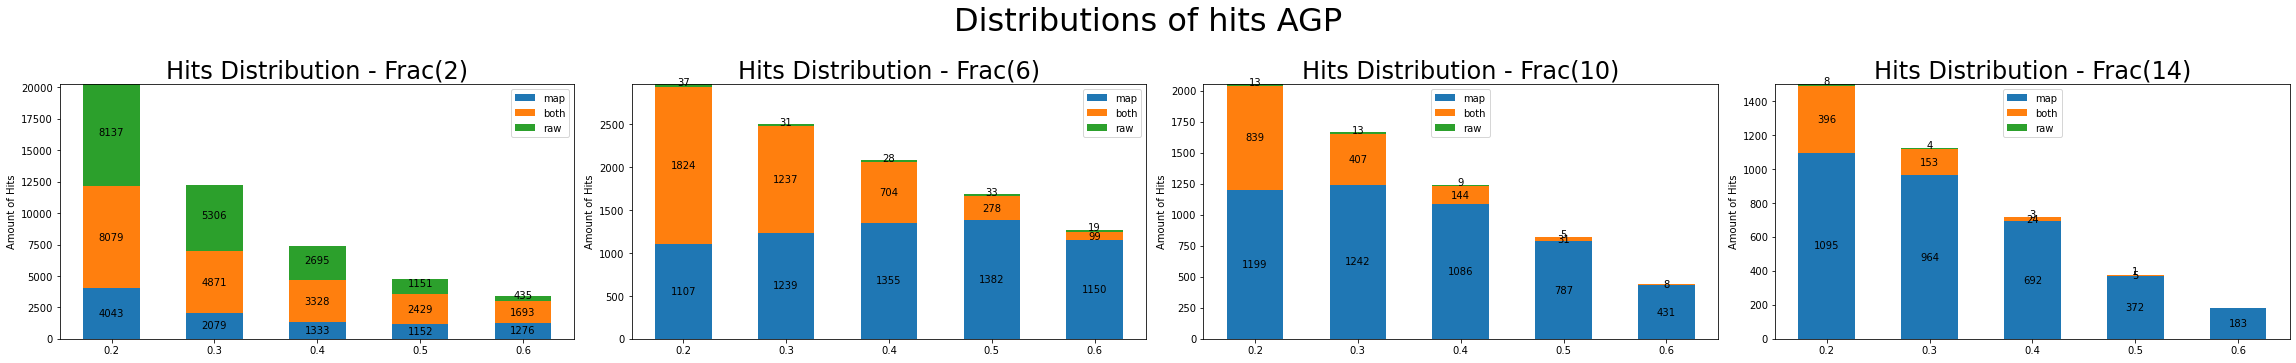

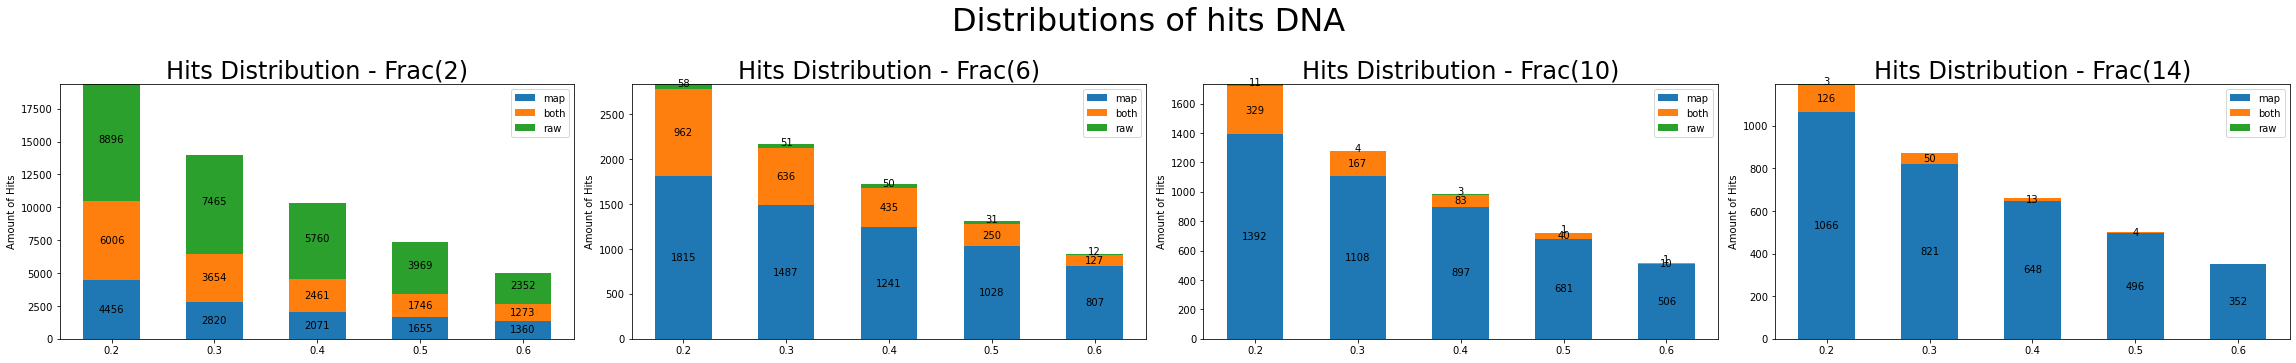

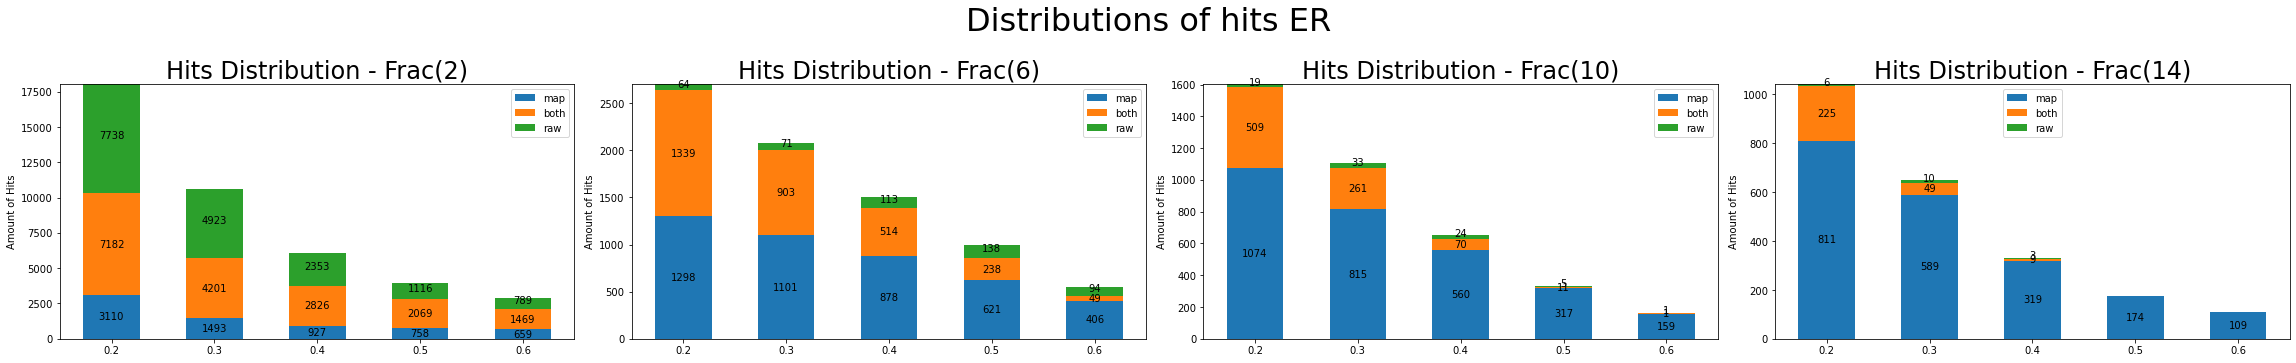

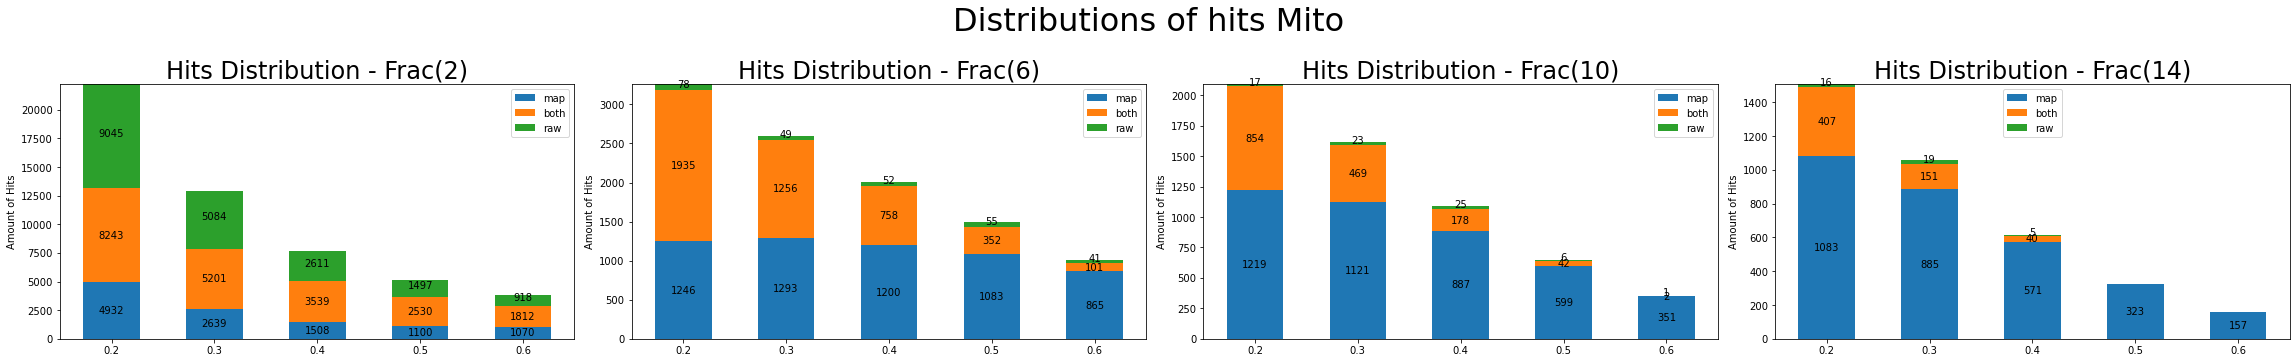

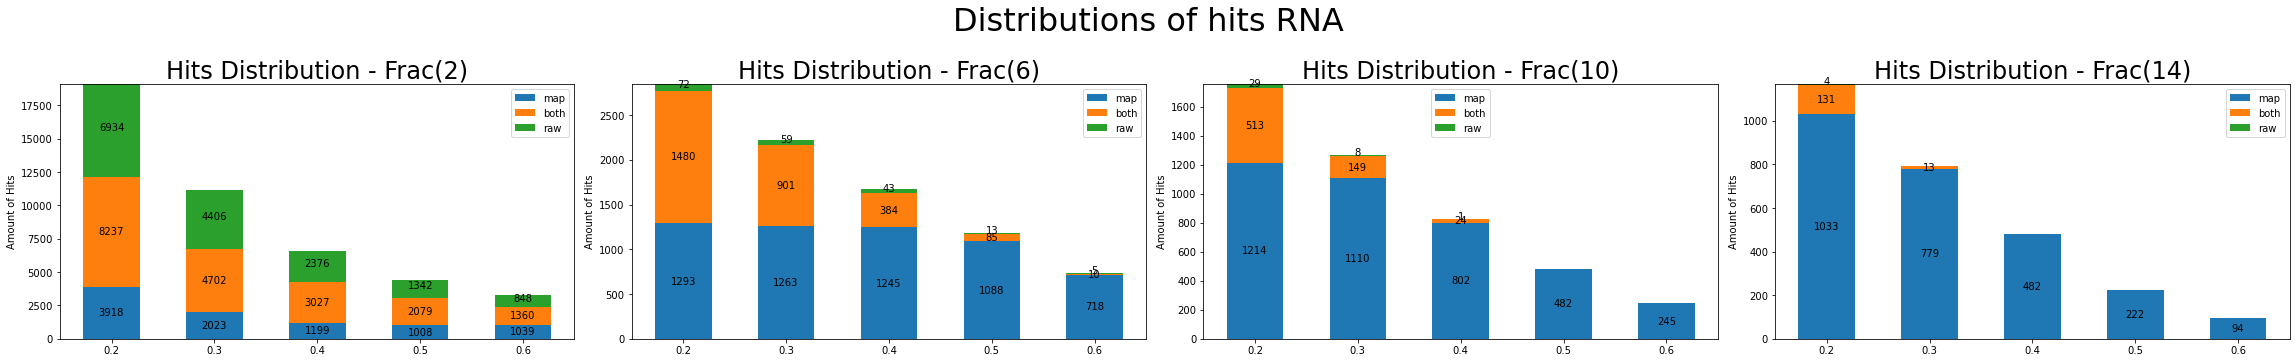

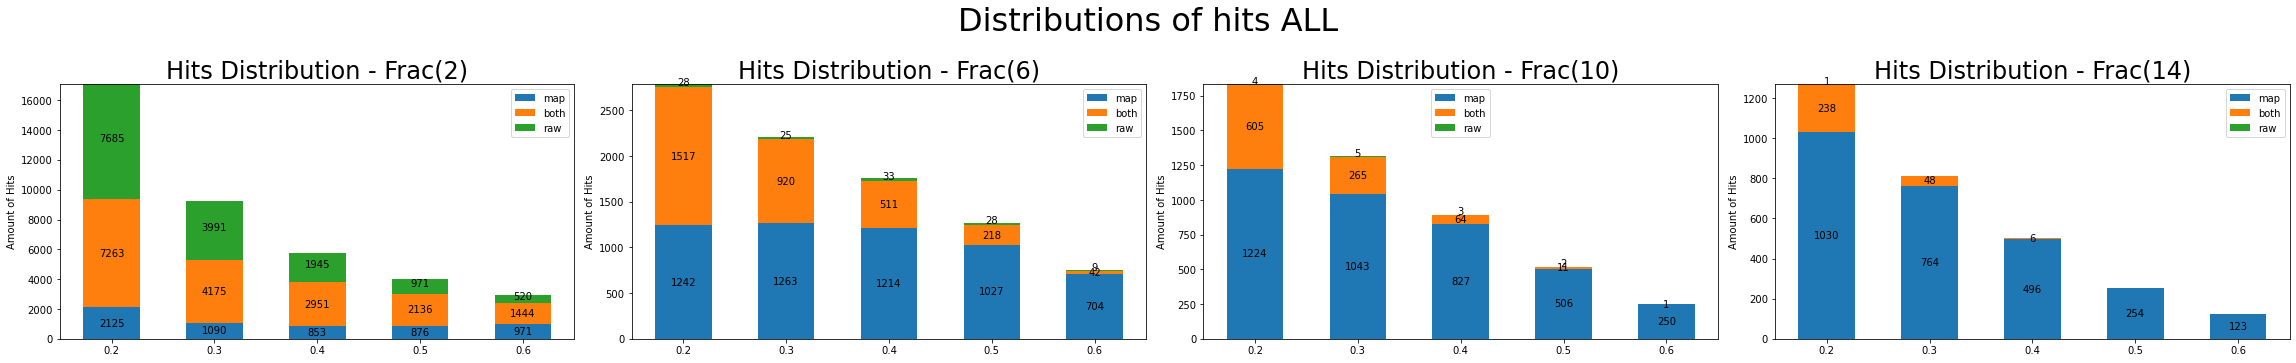

In [25]:
for chan in cols.keys():
    plot_complementary(res, chan, cs_raw, method_a = 'map_no-abs',method_b = 'raw_abs')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

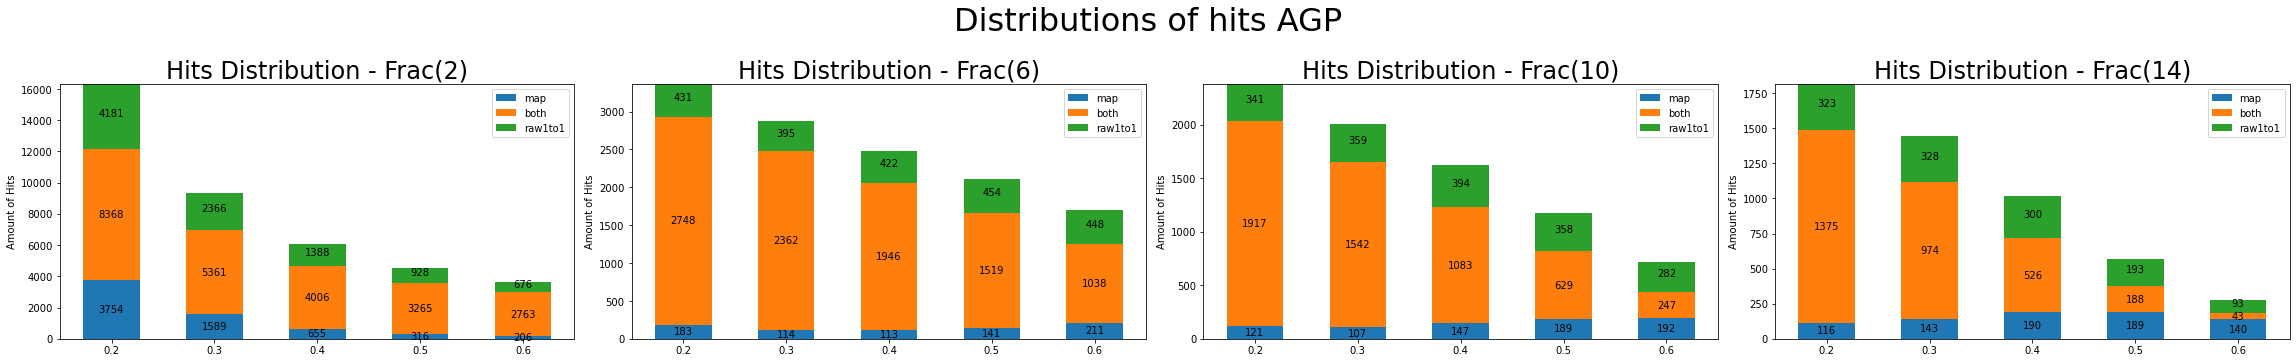

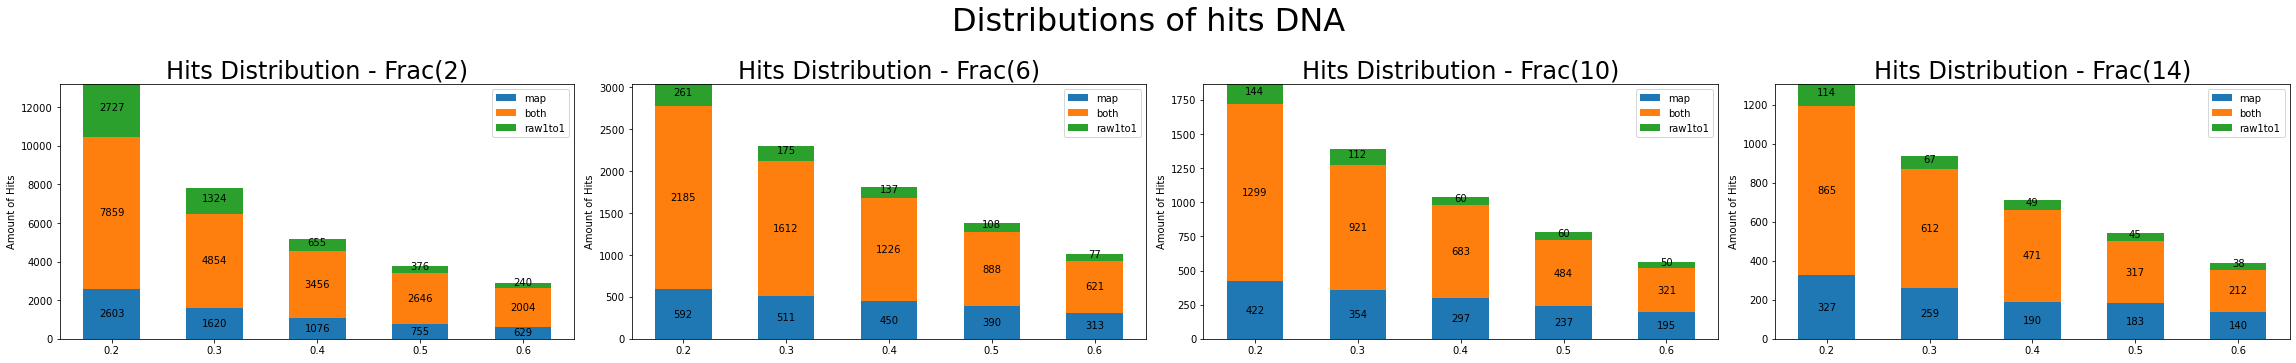

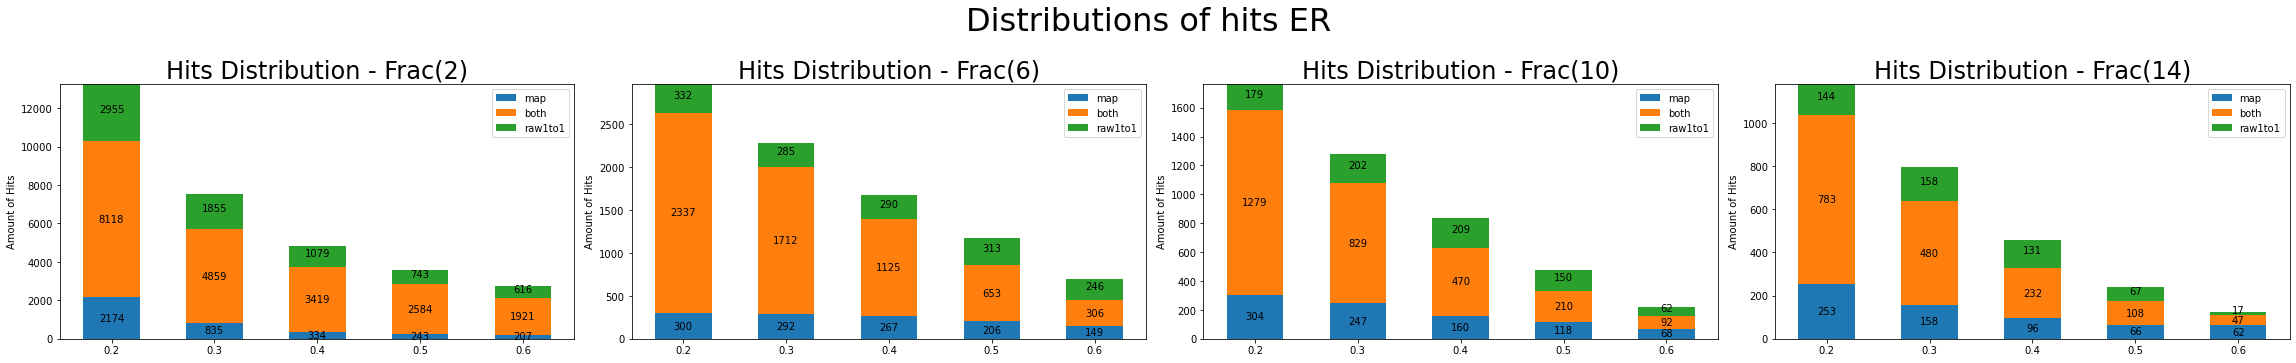

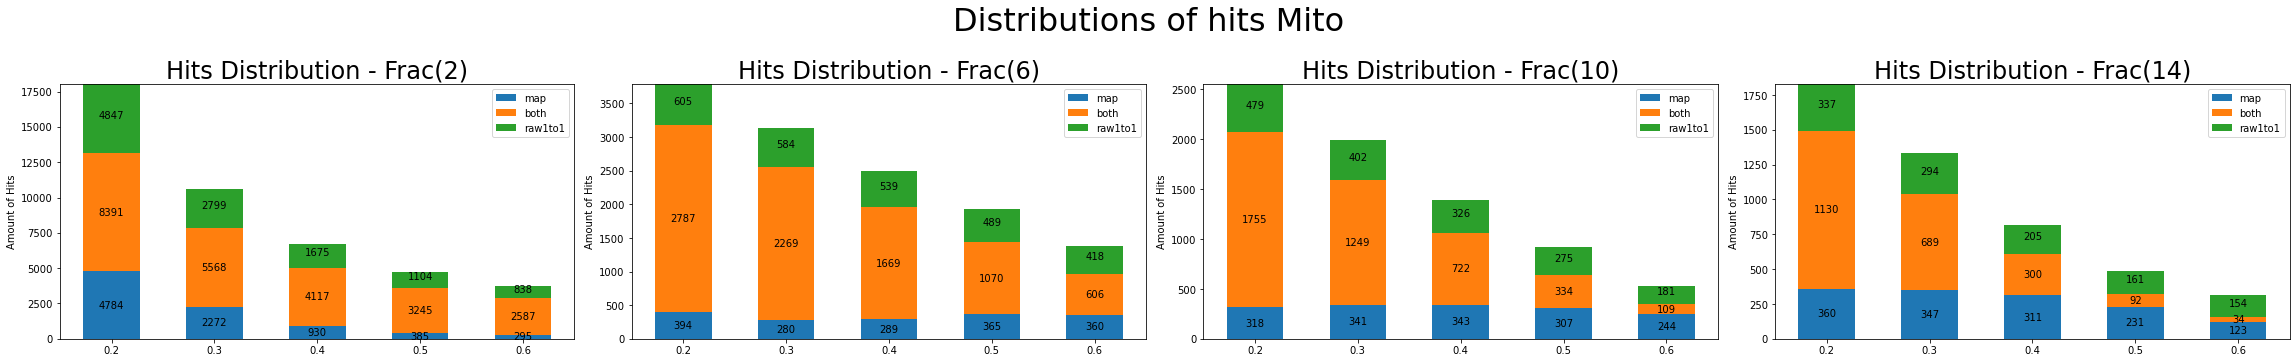

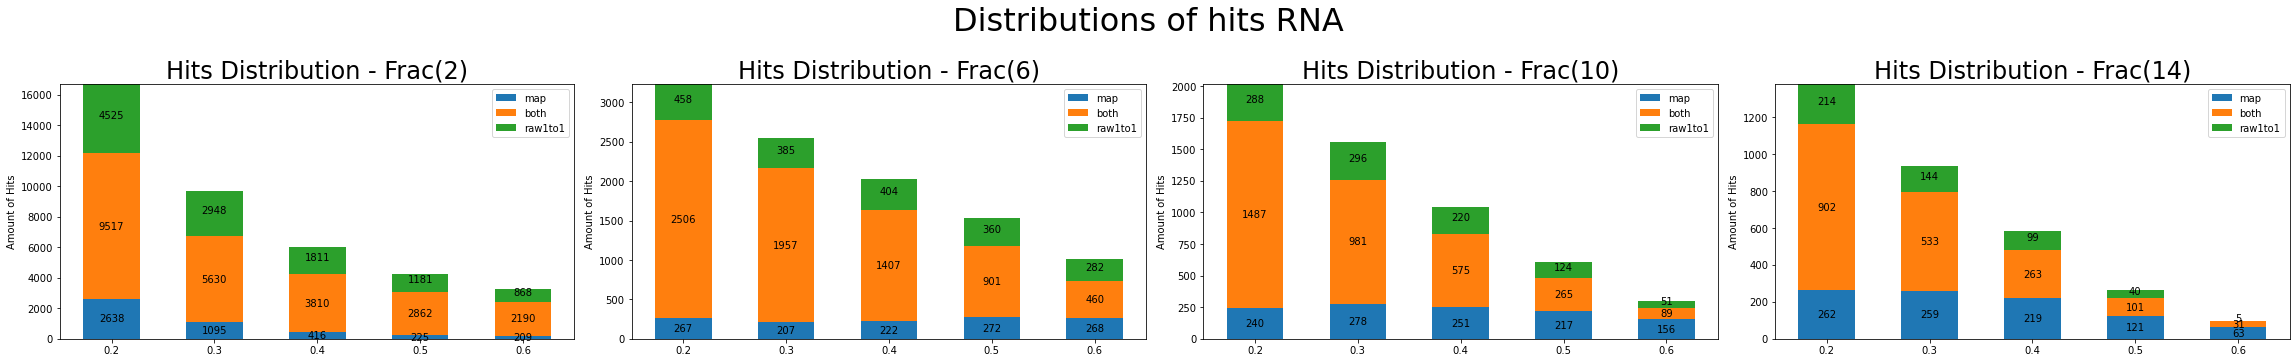

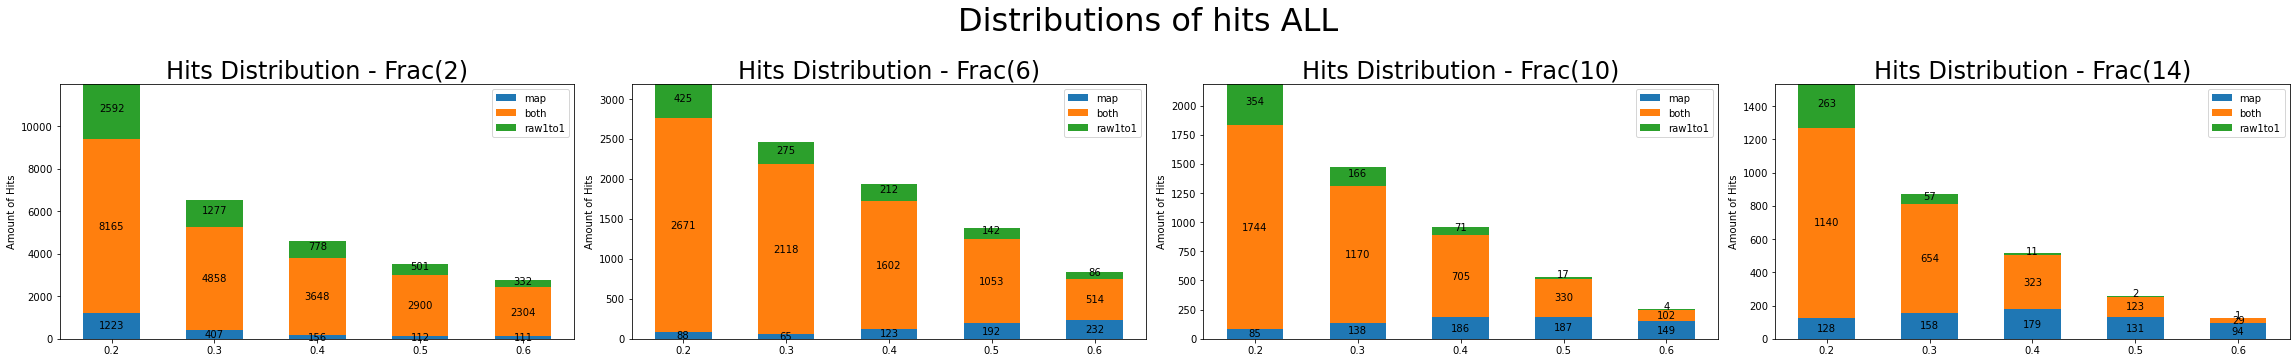

In [26]:
cs_raw1to1 = {}
for chan in cols.keys():
    cs_raw1to1[chan] = {}
    for t in tqdm(ts):
        cs_raw1to1[chan][t] = pd.concat({f'{th:.1f}': res[t].apply(enter_bucket_wrapper(t, th, chan, method_a = 'map_no-abs',method_b = 'raw1to1_no-abs'), axis=1).value_counts() for th in np.arange(0, 1.01, 0.1)}, axis=1)

for chan in cols.keys():
    plot_complementary(res, chan, cs_raw1to1, method_a = 'map_no-abs',method_b = 'raw1to1_no-abs')